In [1]:
import numpy as np
import math
import pandas as pd
import scipy
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

(-0.5, 25.0)

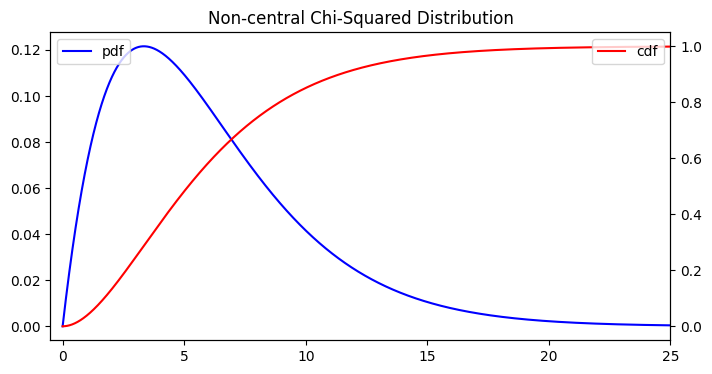

In [2]:
# looks more exponential as lambda falls
# as DOF rises, pdf peels off the y-axis and looks more log/normal
nsamples = 10000
x = np.linspace(0,40,nsamples)
df = 4 #degrees freedom
lamb = 2 #non-centrality

# stats.chi2.pdf() #chi-squared
f = stats.ncx2.pdf(x, df=df, nc=lamb)
F = stats.ncx2.cdf(x, df, lamb)
fig,axes = plt.subplots(figsize=(8,4))
axes.set_title('Non-central Chi-Squared Distribution')
axes.plot(x,f, 'b', label='pdf')
axes.legend(loc=2)
axes2 = axes.twinx()
axes2.plot(x,F,'r', label='cdf')
axes2.legend(loc=1)
plt.xlim(-0.5,25)

Text(0, 0.5, 'f(x)')

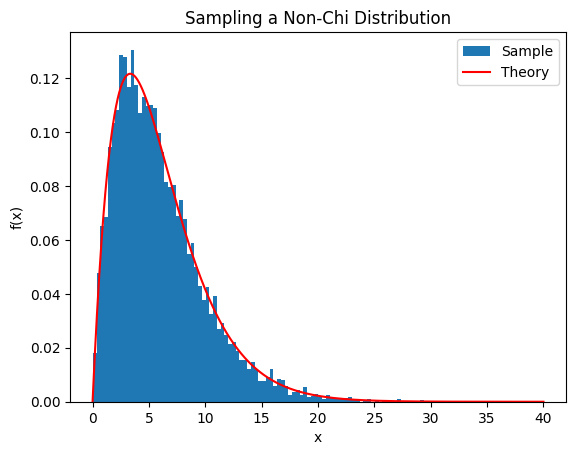

In [3]:
# Sampling a non-chi distribution
## Attempt to Calculate:
# U = np.random.rand(nsamples) #uniform dist
# bessel = scipy.special.jv(df/2-1,np.sqrt(lamb*U))
# X = (0.5*np.exp(-(U+lamb)/2)*((U/lamb)**((df/4)-0.5)))*bessel

X = np.random.noncentral_chisquare(df,lamb,nsamples)
plt.hist(X, bins=100, density=True, label='Sample')
plt.plot(x,f, 'r', label='Theory')
plt.legend()
plt.title('Sampling a Non-Chi Distribution')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0.5, 1.0, 'Non-central chi-square PDF with d=5 and $\\lambda=2$')

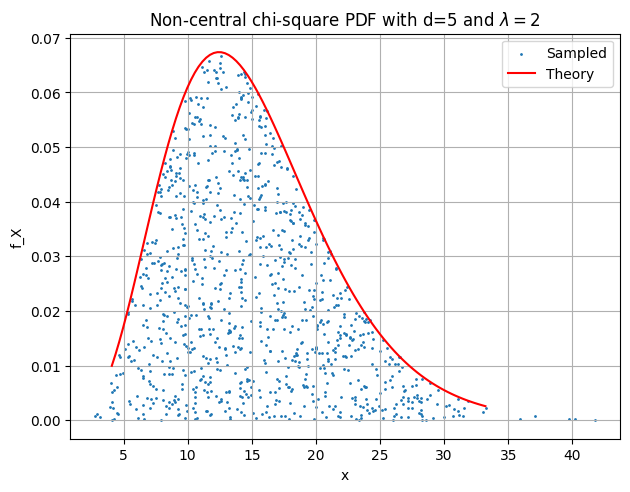

In [17]:
plt.figure()
U = np.random.rand(1,1000)
plt.scatter(X[:1000],U*stats.ncx2.pdf(X[:1000],df,lamb), s=1, label='Sampled')
plt.plot(x,stats.ncx2.pdf(x,df,lamb), color='red', label='Theory')
plt.xlabel('x')
plt.ylabel('f_X')
plt.legend(loc=0)
plt.tight_layout()
plt.grid()
plt.title(r'Non-central chi-square PDF with d=5 and $\lambda=2$')

## Create Non-Central Chi from Bessel

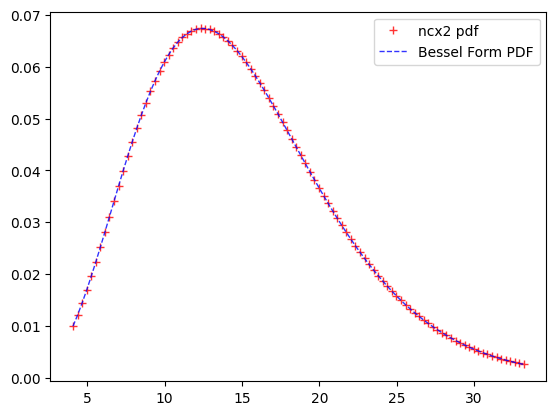

In [4]:
# Question 2
df = 10
lamb = 5
mean, var, skew, kurt = stats.ncx2.stats(df,lamb,moments='mvsk')
x=np.linspace(stats.ncx2.ppf(0.01,df,lamb), stats.ncx2.ppf(0.99,df,lamb),100)
fig, ax = plt.subplots(1,1)
ax.plot(x,stats.ncx2.pdf(x,df,lamb), 'r+',lw=1, alpha=0.8, label='ncx2 pdf')

from scipy.special import iv
bess = 0.5*np.exp(-(x+lamb)/2)*(x/lamb)**(df/4-0.5)*iv(df/2-1,np.sqrt(lamb*x))
# ^ Eq 41 in notes
ax.plot(x,bess,'b--',lw=1, alpha=0.8, label='Bessel Form PDF')
ax.legend()